**Attribute Information:**

**InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.**

**StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.**

**Description: Product (item) name. Nominal.**

**Quantity: The quantities of each product (item) per transaction. Numeric.**

**InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.**

**UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).**

**CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.**

**Country: Country name. Nominal. The name of the country where a customer resides.**

In [1]:
import pandas as pd
pd.set_option('display.max_columns' , 50)
import numpy as np
import matplotlib.pyplot as plt
import squarify
from datetime import timedelta

In [2]:
df = pd.read_csv('C:\Praxis\AI Projects\Marketing\AI in Marketing Dataset\sales_data_sample.csv', encoding = 'unicode_escape')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [9]:
df.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
SALES              0
ORDERDATE          0
PRODUCTLINE        0
PRODUCTCODE        0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [6]:
df.drop(['ORDERLINENUMBER','STATUS','QTR_ID','MONTH_ID','YEAR_ID','MSRP',
        'PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','TERRITORY','CONTACTLASTNAME',
        'CONTACTFIRSTNAME'],axis = 1, inplace = True)

In [7]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2003-02-24,Motorcycles,S10_1678,Land of Toys Inc.,USA,Small
1,10121,34,81.35,2765.90,2003-05-07,Motorcycles,S10_1678,Reims Collectables,France,Small
2,10134,41,94.74,3884.34,2003-07-01,Motorcycles,S10_1678,Lyon Souveniers,France,Medium
3,10145,45,83.26,3746.70,2003-08-25,Motorcycles,S10_1678,Toys4GrownUps.com,USA,Medium
4,10159,49,100.00,5205.27,2003-10-10,Motorcycles,S10_1678,Corporate Gift Ideas Co.,USA,Medium
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,2004-12-02,Ships,S72_3212,Euro Shopping Channel,Spain,Small
2819,10373,29,100.00,3978.51,2005-01-31,Ships,S72_3212,"Oulu Toy Supplies, Inc.",Finland,Medium
2820,10386,43,100.00,5417.57,2005-03-01,Ships,S72_3212,Euro Shopping Channel,Spain,Medium
2821,10397,34,62.24,2116.16,2005-03-28,Ships,S72_3212,Alpha Cognac,France,Small


In [10]:
df.nunique()

ORDERNUMBER         307
QUANTITYORDERED      58
PRICEEACH          1016
SALES              2763
ORDERDATE           252
PRODUCTLINE           7
PRODUCTCODE         109
CUSTOMERNAME         92
COUNTRY              19
DEALSIZE              3
dtype: int64

In [11]:
df['COUNTRY'].value_counts().head(5)  #main business is coming from USA

USA          1004
Spain         342
France        314
Australia     185
UK            144
Name: COUNTRY, dtype: int64

In [12]:
# --Group data by Customer Name--


# Create snapshot date
snapshot_date = df['ORDERDATE'].max() + timedelta(days=1)
print(snapshot_date)

# Grouping by Customer Name
data_process = df.groupby(['CUSTOMERNAME']).agg({
        'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
        'ORDERNUMBER': 'count',
        'SALES': 'sum'})

# Rename the columns 
data_process.rename(columns={'ORDERDATE': 'Recency',
                         'ORDERNUMBER': 'Frequency',
                         'SALES': 'MonetaryValue'}, inplace=True)

2005-06-01 00:00:00


In [13]:
data_process

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96
...,...,...,...
"Vida Sport, Ltd",275,31,117713.56
Vitachrome Inc.,208,25,88041.26
"Volvo Model Replicas, Co",194,19,75754.88


In [14]:
import seaborn as sns

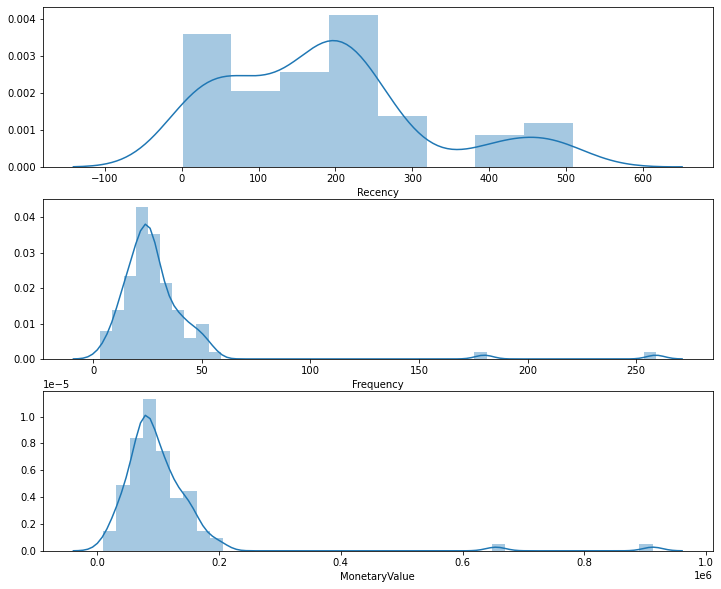

In [15]:
#Plot RFM Distribution
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])

# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])

# Show the plot
plt.show()

In [16]:
# --Calculate R and F groups--

# Create labels for Recency and Frequency
r_labels = range(1,5); f_labels = range(1, 5); m_labels = range(1,5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)

# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)

#Assign these labels to 4 equal percentile groups
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels = m_labels)

# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
data_process

,Recency,Frequency,MonetaryValue,R,F,M
CUSTOMERNAME,,,,,,
"AV Stores, Co.",196,51,157807.81,3,4,4
Alpha Cognac,65,20,70488.44,1,2,2
Amica Models & Co.,265,26,94117.26,4,2,3
"Anna's Decorations, Ltd",84,46,153996.13,2,4,4
Atelier graphique,188,7,24179.96,3,1,1
...,...,...,...,...,...,...
"Vida Sport, Ltd",275,31,117713.56,4,3,3
Vitachrome Inc.,208,25,88041.26,3,2,3
"Volvo Model Replicas, Co",194,19,75754.88,3,1,2


In [17]:
# Concat RFM quartile values to create RFM Segments

def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,3,4,4,344
Alpha Cognac,65,20,70488.44,1,2,2,122
Amica Models & Co.,265,26,94117.26,4,2,3,423
"Anna's Decorations, Ltd",84,46,153996.13,2,4,4,244
Atelier graphique,188,7,24179.96,3,1,1,311


In [18]:
# Count of unique segments

rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

30


In [19]:
# Calculate RFM_Score

rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

CUSTOMERNAME
AV Stores, Co.             11.0
Alpha Cognac                5.0
Amica Models & Co.          9.0
Anna's Decorations, Ltd    10.0
Atelier graphique           5.0
Name: RFM_Score, dtype: float64


In [20]:
# Define rfm_level function

def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
    
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,,
"AV Stores, Co.",196,51,157807.81,3,4,4,344,11.0,Can't Loose Them
Alpha Cognac,65,20,70488.44,1,2,2,122,5.0,Promising
Amica Models & Co.,265,26,94117.26,4,2,3,423,9.0,Can't Loose Them
"Anna's Decorations, Ltd",84,46,153996.13,2,4,4,244,10.0,Can't Loose Them
Atelier graphique,188,7,24179.96,3,1,1,311,5.0,Promising


In [21]:
# Calculate average values for each RFM_Level, and return a size of each segment 

rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

                 Recency Frequency MonetaryValue      
                    mean      mean          mean count
RFM_Level                                             
Can't Loose Them   154.0      50.9      181906.0    30
Champions          162.9      28.2      100433.9    12
Loyal              217.8      23.7       84876.8    18
Needs Attention    110.9      13.8       47888.3     8
Potential          298.8      16.9       58584.6    16
Promising           82.1      18.9       65249.9     8


The other 40% will need some work. Let’s explore using some ads to re-target them:

1. Potential — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!
2. Promising — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.
3. Needs Attention — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.
4. Require Activation — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

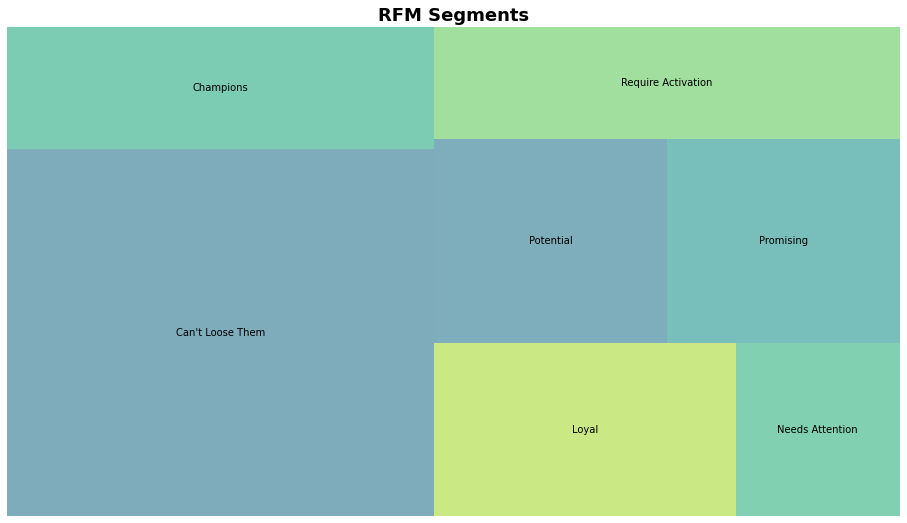

In [26]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()